<a href="https://colab.research.google.com/github/KIrie-0217/Python_practice/blob/master/%E7%94%BB%E5%83%8F%E5%87%A6%E7%90%86%E3%81%AE%E5%9F%BA%E7%A4%8E_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-means法によるクラスタリング

- k-means法という統計的手法で色をクラス分け
- k-means法の実装については割愛
- こういうのもあるよって説明

In [19]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [20]:
# 画像を読み込む。
img = cv2.imread("./apple_01.jpg")

# 画像で使用されている色一覧。(W * H, 3) の numpy 配列。
colors = img.reshape(-1, 3).astype(np.float32)

# クラスタ数
K = 5
# 最大反復回数: 10、移動量の閾値: 1.0
criteria = cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS, 10, 1.0

ret, labels, centers = cv2.kmeans(
    colors, K, None, criteria, attempts=10, flags=cv2.KMEANS_RANDOM_CENTERS
)
labels = labels.squeeze(axis=1)  # (N, 1) -> (N,)
centers = centers.astype(np.uint8)  # float32 -> uint8

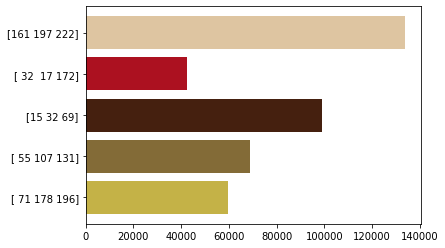

In [22]:
# 各クラスタに属するサンプル数を計算する。
_, counts = np.unique(labels, axis=0, return_counts=True)

# matplotlib の引数の仕様上、[0, 1] にして、(R, G, B) の順番にする。
bar_color = centers[:, ::-1] / 255
bar_text = list(map(str, centers))

# ヒストグラムを表示する。
a = plt.barh(np.arange(K), counts, color=bar_color, tick_label=bar_text)
plt.show(a)

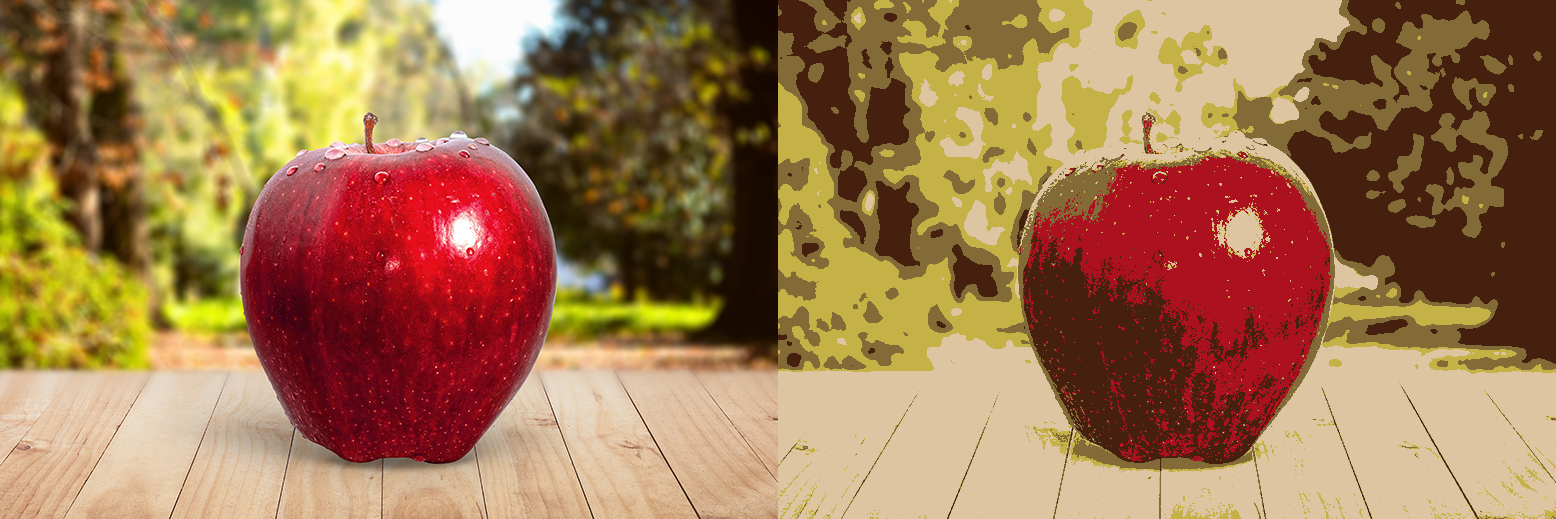

In [27]:
dst = centers[labels].reshape(img.shape)

# 画像を並べて表示
imgs = cv2.hconcat([img,dst])
cv2_imshow(imgs)